<a href="https://colab.research.google.com/github/ehcacao/Pynthon/blob/master/aula_04_Allura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 4

In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
len(dados_notas)

97270

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


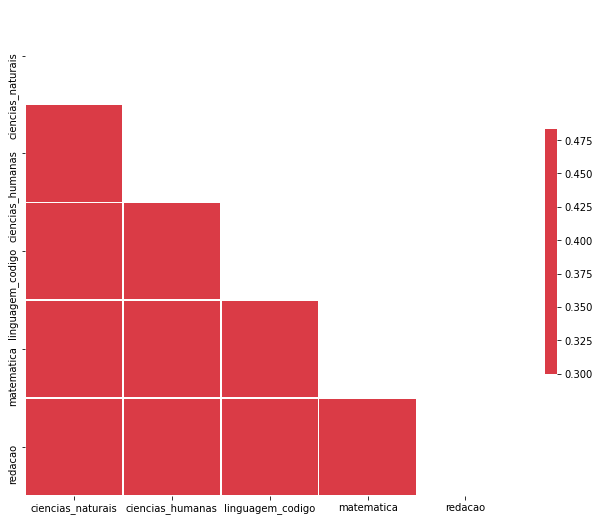

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormaq
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspesct ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

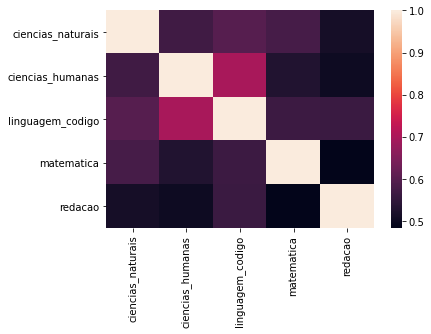

In [0]:
sns.heatmap(corr)

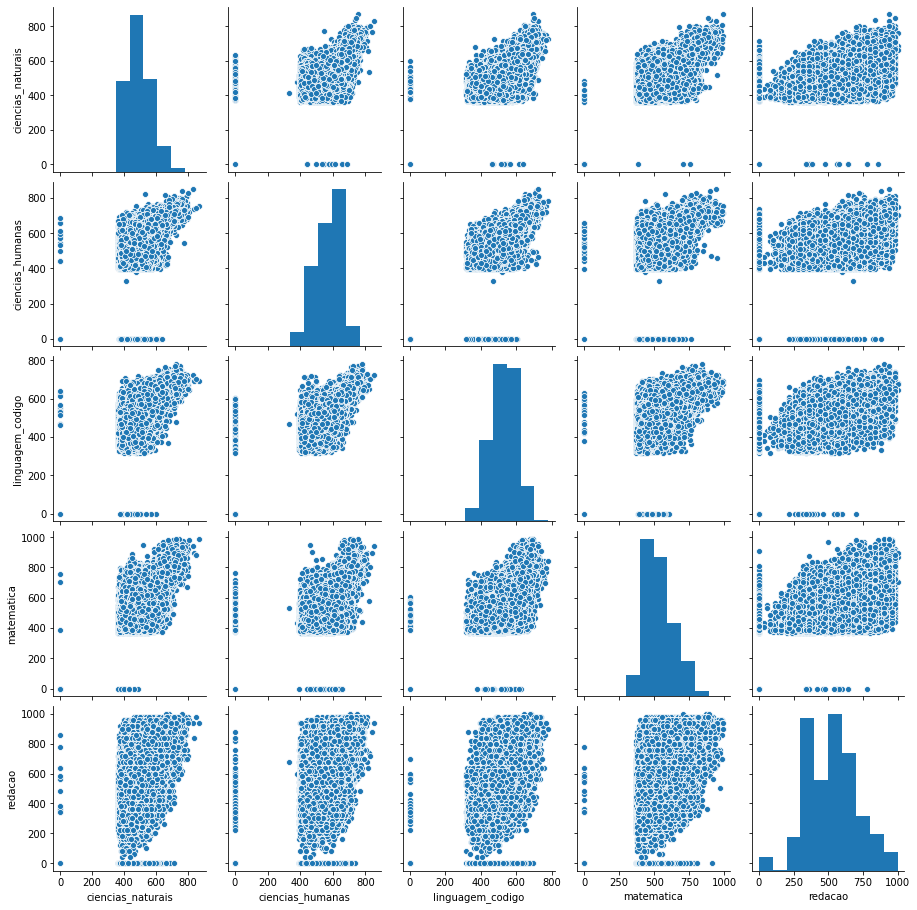

In [0]:
sns.pairplot(dados_notas)

##Desafios Aula 4

##01
Se a pessoa não tece presença, preencha a nota dela com algum número. A nota0? A nota média? A mediana?

In [0]:
#As pessoas que não foram possuem prestaram o Enem tem a nota NaN, transformamos isso em 0.
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas]
dados_notas.columns = ["ciências_naturais", "ciências_humanas", "linguagem_codigo", "matemática", "redação"]
dados_notas = dados_notas.fillna(0)

In [0]:
dados_notas.head(15)

,ciências_naturais,ciências_humanas,linguagem_codigo,matemática,redação
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00
6,428.50,505.20,521.00,436.80,560.00
7,0.00,0.00,0.00,0.00,0.00
8,491.80,575.70,524.40,487.60,660.00
9,568.00,650.50,633.10,587.60,520.00


##02
A matriz de correlação está feiosa, vamos deixar mais bonita? Não se esqueça de manter os valores dentro delas.

In [0]:
corr = dados_notas.corr()

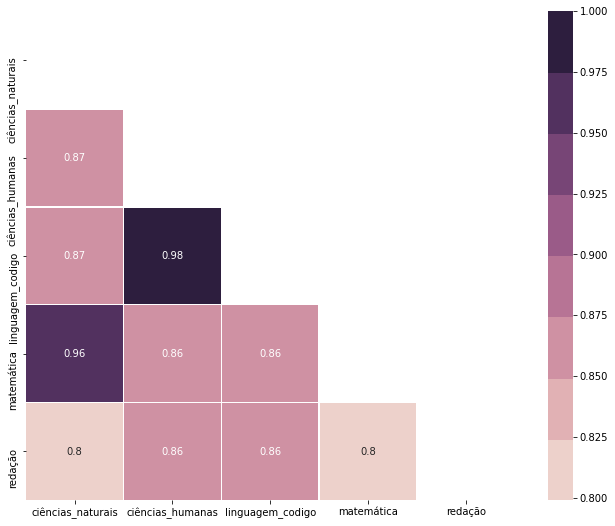

In [0]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (12, 9))
sns.heatmap(corr, annot = True, square = True, linewidths = 0.5, cmap = sns.cubehelix_palette(8), mask = mask)

##03
Paiplor dos acertos de cada categoria(CN, CH, MT, LC, nota da redação). Usar o gabarito e as respostas.

Foram excluídos linhas que apresentavam "NaN" nas colunas de RESPOSTAS, para a realização da análise de número de acertos.

In [0]:
#Retirar os NaN
respostas = dados[['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN',
 'TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT', 'NU_NOTA_REDACAO']].dropna()

#Separar as strings de respostas e gabaritos para a média
resp_cn = respostas["TX_RESPOSTAS_CN"].values
gab_cn = respostas["TX_GABARITO_CN"].values

resp_ch = respostas["TX_RESPOSTAS_CH"].values
gab_ch = respostas["TX_GABARITO_CH"].values

resp_lc = respostas["TX_RESPOSTAS_LC"].values
gab_lc = respostas["TX_GABARITO_LC"].values

resp_mt = respostas["TX_RESPOSTAS_MT"].values
gab_mt = respostas["TX_GABARITO_MT"].values


In [0]:
#A função recebe duas arrays, e faz a comparação que estão dentro de cada uma delas.
#O count serve para quando que for encontrado uma igualdade entre as duas, seja atribuido +1, formando assim os acertos.
#Coloca o count dentro de uma lista.
#Essa função retorna a lista com os valores de acertos de cada aluno.

def acertos(arrayR, arrayG):
  quant_acertos = []
  for c in range(len(arrayR)):
    count = 0
    for i in range(45):
      if (arrayR[c][i] == arrayG[c][i]):
        count += 1
    quant_acertos.append(count)
  return quant_acertos

In [0]:
respostas["acertos_cn"] = acertos(resp_cn, gab_cn)
respostas['acertos_ch'] = acertos(resp_ch, gab_ch)
respostas['acertos_lc'] = acertos(resp_lc, gab_lc)
respostas['acertos_mt'] = acertos(resp_mt, gab_mt)

In [0]:
respostas.head(10)

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,680.00,11,27,30,22
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.00,8,9,8,6
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.00,7,10,10,10
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.00,11,9,14,8
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.00,8,12,15,13
9,ADDCEEBCDDBCADCCBCBBACDEBBACAAAADACACADEEBCEB,BEDCABBBEDEABEEDAEBBCEECBEACCEDAECEABDBDAEACE,99999BBDCCEDADEAEABDEBABABDADACDCABCECBBADABCB...,CCBDDEECBAAECCDDBDAEDBAEDDAABDBDEACBECBEAADDE,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,520.00,15,25,25,11
10,AEDBDACADEDABAEDADBACCAADBDEAABCBACBEAAABAABC,EDBABBBEDDECBBAEEEDBCCBDCECDEDEEAAEAAEBDDABEE,ACDAB99999ACDEAEAAABCBADBBBCEBBDDBEABDCDBEEDEC...,EADADCEABAAAADDABDAEAAAADEEACECDBDAEEEEBEDDAC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,800.00,20,24,27,25
11,ADBAECCAAACBEEDABBDBACDBECADDDDEBDBEBACEBDCCE,EAACACEBBACCCCDCBEEDDDAEEEEEEDCAEBEDBEEAAECBB,99999CEBDBEBEADECBBBDBBADABACCABBBACDECBCDDACD...,BDBDCEEEABBBCADDDCBAEEACCEDACCACCABBADDAAEDBC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,680.00,17,18,24,14
12,DCEBBEBEEEDDBDBCCABDCABACEBCBCDCEDBBCDAABBDCE,CEACADBADBECBCBDBEABECCBEAEDCEBECEEBBDBDADBED,99999DBADCABBCDABEDCCBBCDBCBEDACABCCDCBBCEBAAB...,EDCBADACBEDCDCCBDBDDBCBEACDBBCBACACCEBAACBECC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,300.00,6,23,10,7
13,EBDECAADDCCBBCEBCABEDCCDDACDDDBCBADCDDBEDEEBD,AACDDEAAECCAADEEDCABADEAABDEDAAACEBDAEDAEAEDC,99999BBCDBCDCBABCBACDDDCBABBEAECACEBAECABCDDCB...,AABDDDCDDEADACCEABECECBBABAEEBCADBBCCBACECABA,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CACDDBDDECCE

In [0]:
redacao_e_acertos = respostas[["NU_NOTA_REDACAO", "acertos_cn", "acertos_ch", "acertos_lc", "acertos_mt"]]

In [0]:
redacao_e_acertos.head(10)

,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
1,680.00,11,27,30,22
2,600.00,8,9,8,6
3,400.00,7,10,10,10
6,560.00,11,9,14,8
8,660.00,8,12,15,13
9,520.00,15,25,25,11
10,800.00,20,24,27,25
11,680.00,17,18,24,14
12,300.00,6,23,10,7
13,360.00,11,15,23,12


In [0]:
redacao_e_acertos.corr()

,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
NU_NOTA_REDACAO,1.00,0.48,0.54,0.56,0.44
acertos_cn,0.48,1.00,0.62,0.56,0.57
acertos_ch,0.54,0.62,1.00,0.73,0.57
acertos_lc,0.56,0.56,0.73,1.00,0.53
acertos_mt,0.44,0.57,0.57,0.53,1.00


In [0]:
#Redação impecável
redacao_1000 = redacao_e_acertos.query("NU_NOTA_REDACAO == 1000")
redacao_1000

,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
91289,"1,000.00",30,37,25,35
98019,"1,000.00",36,39,29,39
131467,"1,000.00",23,32,28,17


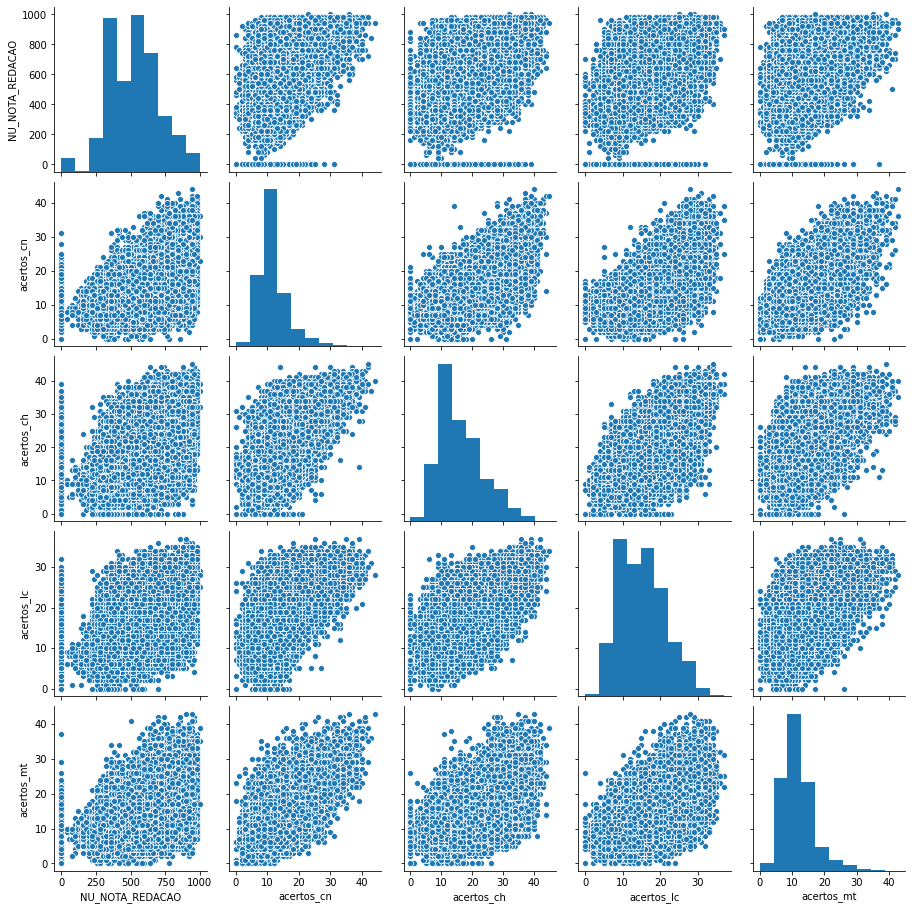

In [0]:
#Gráfico com os números de acertos em cada matéria e na redação
sns.pairplot(redacao_e_acertos)

##04

Remover todos os zeros. Tomar cuidado que no desafio 1, já tomamos decisões ligadas dos dados tambêm. Você tambêm pode exportar para outro CSV se quiser.

In [0]:
dados_sem_zero = dados_notas.replace(0,np.NaN)
dados_sem_zero = dados_sem_zero.dropna()

,ciências_naturais,ciências_humanas,linguagem_codigo,matemática,redação
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


In [0]:
dados_sem_zero.head(10)

,ciências_naturais,ciências_humanas,linguagem_codigo,matemática,redação
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
9,568.00,650.50,633.10,587.60,520.00
10,630.20,651.50,625.90,767.50,800.00
11,591.40,622.30,614.90,584.10,680.00
12,414.20,626.30,486.30,474.70,300.00
13,487.50,607.00,594.00,559.70,360.00


##05

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
#Resolvido baseado no colab do Thiago Souza

dados_sem_zero = dados.dropna(subset=colunas_de_notas)

In [0]:
desc_cores = {
    "CN":{
        447: "Azul",
        448: "Amarela",
        449: "Cinza",
        450: "Rosa",
        463: "Laranja - Adaptada Ledor",
        467: "Verde -Videoprova - Libras",
        487: "Amarela (Reaplicação)",
        488: "Cinza (Reaplicação)",
        489: "Azul (Reaplicação)",
        490: "Rosa (Reaplicação",
    },
    "CH": {
        451: "Azul",
        452: "Amarela",
        453: "Cinza",
        454: "Rosa",
        464: "Laranja - Adaptada Ledor",
        468: "Verde -Videoprova - Libras",
        491: "Amarela (Reaplicação)",
        492: "Cinza (Reaplicação)",
        493: "Azul (Reaplicação)",
        494: "Rosa (Reaplicação",
    },
    "LC": {
        455: "Azul",
        456: "Amarela",
        457: "Cinza",
        458: "Rosa",
        465: "Laranja - Adaptada Ledor",
        469: "Verde -Videoprova - Libras",
        495: "Amarela (Reaplicação)",
        496: "Cinza (Reaplicação)",
        497: "Azul (Reaplicação)",
        498: "Rosa (Reaplicação",
    },
    "MT": {
        459: "Azul",
        460: "Amarela",
        461: "Cinza",
        462: "Rosa",
        466: "Laranja - Adaptada Ledor",
        470: "Verde -Videoprova - Libras",
        499: "Amarela (Reaplicação)",
        500: "Cinza (Reaplicação)",
        501: "Azul (Reaplicação)",
        502: "Rosa (Reaplicação",
    }
}

desc_tipos = {
    "CN": "Ciências da Natureza",
    "CH": "Ciências Humanas",
    "LC": "Linguagens e Códigos",
    "MT": "Matemática"
}

def processa_linha(linha, tipo):
  resp = linha["TX_RESPOSTAS_"+tipo]
  gab = linha["TX_GABARITO_"+tipo]
  res = dict()

  for i in range(len(resp)):
    if resp[i] == 9:
      continue
    res[i+1] = (resp[i] != gab[i]) * 1 # CHECANDO POR ERROS
  
  return pd.Series(res)

maior_indice = -1
maior_valor = -1
maior_cor = "Nenhum"
maior_tipo = "CH"

for tipo in ["CN", "CH", "MT", "LC"]:
  cores = dados_sem_zero[f"CO_PROVA_{tipo}"].unique()
  colunas_eixo_x = [str(i) for i in range(1, 46)]
  for cor in cores:
    tmp = dados_sem_zero.query(f"CO_PROVA_{tipo} == {cor}")[[f"TX_RESPOSTAS_{tipo}", f"TX_GABARITO_{tipo}"]].apply(processa_linha, args=[tipo], axis=1).sum()

    idxmax = tmp.idxmax()

    if maior_valor < tmp[idxmax]:
      maior_indice = idxmax
      maior_valor = tmp[idxmax]
      maior_cor = cor
      maior_tipo = tipo

print("Questão com mais erros: ")
print(f"Prova  : {desc_tipos[maior_tipo]} ({maior_tipo}) - {desc_cores[maior_tipo][int(maior_cor)]} ({maior_cor})")
print(f"Questão: {maior_indice} (primeira questão = 1)")
print(f"Erros  : {maior_valor}")

Questão com mais erros: 
Prova  : Matemática (MT) - Azul (459.0)
Questão: 28 (primeira questão = 1)
Erros  : 24384


##06

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações(principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

Ouvindo em algum podcast, não sei qual, tenho notado que as analistas de dados querem sempre ter a informação na mão, mas o indivíduo que têm os seus dados capturados para fazer a base de dados, nem sempre é consultado, vemos o que aconteceu no caso Cambridge Analytica, que vendia os dados das pessoas para empresas. Entre outro casos, sempre tem alguém com pensando no dinheiro, a ética perde o valor nesse caso, a ganância fala mais alto com esse tipo de pessoa.